In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [11]:
np.random.seed(seed = 1)
X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
X[10:0]
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc = 0.0, scale = 1.0, size = (1000,)) + intercept

In [15]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.208002189576312
[0.25106337]


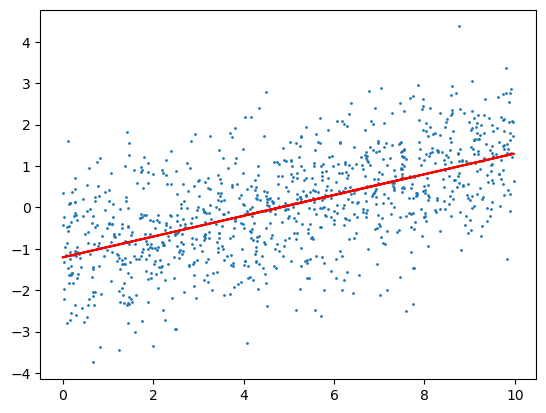

In [17]:
y_pred = lin_reg.predict(X.reshape(-1, 1))
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')

In [1]:
import pandas as pd
df = pd.read_csv("Chapter_1_cleaned_data.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# amostre utilizando holdout
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values,
test_size=0.2, random_state=24)
# crie um objeto para regressao logistica
example_lr = LogisticRegression()
# treine o modelo utilizando os dados proprios para treino
example_lr.fit(X_train, y_train)
# teste o modelo utilizando os dados proprios para teste
y_pred = example_lr.predict(X_test)
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [2]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

In [5]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [6]:
np.unique(prob_sum)

array([1.])

In [23]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20959039, 0.2145797 , 0.21956901, 0.22455832, 0.22954762,
        0.23453693, 0.23952624, 0.24451555, 0.24950485, 0.25449416,
        0.25948347]),
 <BarContainer object of 10 artists>)

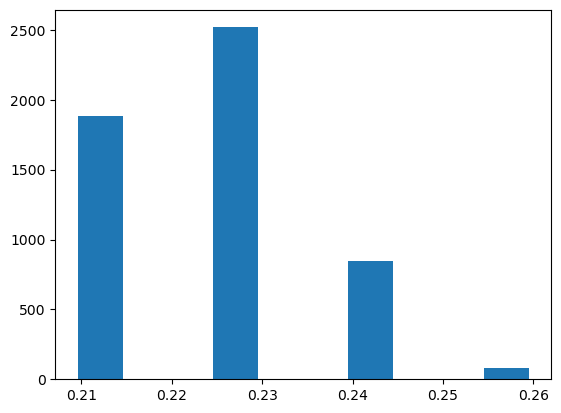

In [25]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

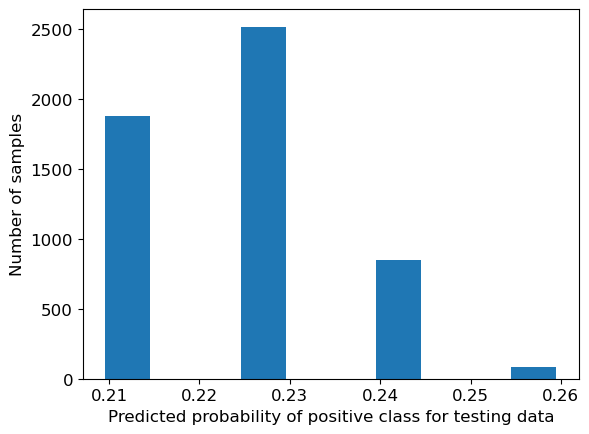

In [29]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [30]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

Text(0, 0.5, 'Number of samples')

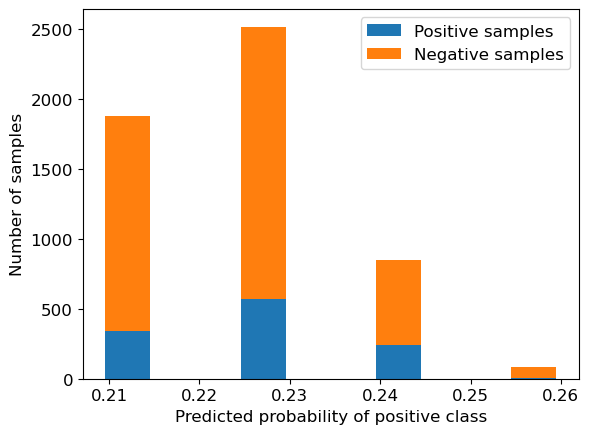

In [31]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [33]:
metrics.roc_auc_score(y_test, y_pred)

0.5